# Utilizing a Keras Classifier to Aid in Disease Identification

As Machine Learning becomes more effecient and more available to the masses, there more applications for the technology in many fields. One such field is medicine. Within this field, doctors, surgeons, paramedics, and other members need years of expertise to effectively treat their patient. Few tools such as WebMD and the Mayo Clinic make valuable medical data available to the layman in an easy format. Nonetheless, to utilize these tools effectively, the user has to have to have a sense of the illness at hand. In order to aid the enter general public, machine learning can be used. Instead of relying on an individual's latent knowledge on a disease, machine learning can use information of disease to identify and offer an appropriate treatment.  

## Goal

The goal of this project is to utilize a Keras Image Classifier to identify diseases. After identifying the disease, the program will take the identified class and search in a database for an appropraite response. The response will compose of treatment, cause, and lenght. This classifier will try to classify the following wound types: lacerations, abrasion, avulsion, punctures, and contusions. 

## Model

This project utilizes the architecture of the VGG16 Model. The VGG16 is a 16 layer convultional deep network that was originally trained on ImageNet. For this project, only the architecture will be used and the weights will be trained using medical images. 

![Model](Img/picture.jpg)

## Data Collection

Data will be collected via Google Images and will be augmented before the model is trained. However, due to the vast quantaties of images required for testing, training, and validating, proper credit cannot be given to each one. Nonetheless, since the purpose of the data is for research purposes, everything falls under Fair Use. 

### Dependencies

In [1]:
import numpy as np #NECESSARY FOR ARRAY PREPERATION AND MACHINE LEARNING
from matplotlib import pyplot as plt #WE ARE USING MATPLOTLIB TO PLOT OUR WORK AS WE DEVELOP
from sklearn.metrics import confusion_matrix #THIS IS USED IN THE END TO SEE VISUALLY THE ACCURACY OF OUR MODEL
import itertools #THIS IS NECESSARY FOR THE CONFUSION MATRIX FUNCTION 
%matplotlib inline

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam #ADAM STANDS FOR ADAPTIVE MOMENT; THIS IS A VERY GOOD OPITMIZER
from keras.metrics import categorical_crossentropy #SINCE WE ARE USING MULITPLE CLASSES

from keras.preprocessing.image import ImageDataGenerator #THIS HELPS TO PROCESS THE DATA FROM A DIRECTORY
from keras.layers.normalization import BatchNormalization #THIS WILL HELP PROCESS THE IMAGE BATCHES
from keras.layers.convolutional import * #THIS IS NEEDED FOR THE CNN


Using TensorFlow backend.


In [2]:
#THIS IS A GENERIC CONFUSION MATRIX USED TO EVALUATE THE MODEL
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [3]:
#THIS SIMPLY HELPS US VISUALIZE THE DATA ON CERTAIN INTERVALS

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')



### Data Preperation

In [4]:
test_path = 'Data/test'
train_path = 'Data/train'
valid_path = 'Data/valid'
#THIS IS THE PATH IN WHICH THE MODEL GONNA TAKE INPUT
#WITHING THESE DIRECTORIES ARE SUBFOLDERS WHICH ARE USED AS THE CLASSES

In [5]:
h = 224 #Represents Height
w = 224 #Represents Width


train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size = (h, w), classes = ['Contusion', 'Laceration', 'Avulsion', 'Abrasion', 'Puncture'], batch_size = 10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size = (h, w), classes = ['Contusion', 'Laceration', 'Avulsion', 'Abrasion', 'Puncture'], batch_size = 10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size = (h, w), classes = ['Contusion', 'Laceration', 'Avulsion', 'Abrasion', 'Puncture'], batch_size = 10)
#THIS IS THE GENERATION PREPARATION FROM THE FUNCTION IMAGEDATAGENERATOR
#batch size = the numbers of photo in the directory

Found 857 images belonging to 5 classes.
Found 184 images belonging to 5 classes.
Found 191 images belonging to 5 classes.


In [6]:
imgs, labels = next(train_batches)
#TAKES A SAMPLE OF THE TRAINING BATCH

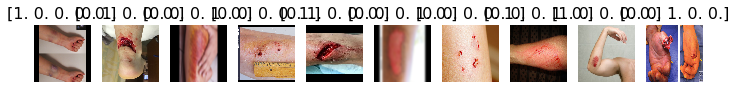

In [7]:
plots(imgs, titles = labels)
#SHOWS THE SAMPLES OF ATA

### Model Creation

In [8]:
vgg16_model = keras.applications.vgg16.VGG16()
vgg16_model.layers.pop()
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False
#WE ARE IMPORTING THE VGG16 MODEL INTO A MODEL CALLED VGG16_MODEL
#WE THEN POP THE LAST LAYER OFF
#WE THEN CONVERT THE VGG16 MODEL INTO A SEQUENTIAL USING A REPLACING FOR LOOP

In [9]:
model.add(Dense(5, activation = 'softmax')) #THIS IS THE LAYER THAT WILL CLASSIFY INTO CATEGORIES

In [10]:
model.compile(Adam(lr = .0001), loss = 'categorical_crossentropy', metrics = ['accuracy']) 

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

### Model Training

In [12]:
history = model.fit_generator(train_batches, steps_per_epoch = 20, validation_data = valid_batches, validation_steps = 5, epochs = 100, verbose =1)
#model.save('MVC.h5')

Epoch 1/100
20/20 [==============================] - 272s 14s/step - loss: 2.4628 - acc: 0.2350 - val_loss: 2.1703 - val_acc: 0.2283
Epoch 2/100
20/20 [==============================] - 262s 13s/step - loss: 1.8857 - acc: 0.3200 - val_loss: 1.9221 - val_acc: 0.2663
Epoch 3/100
20/20 [==============================] - 255s 13s/step - loss: 1.6112 - acc: 0.3614 - val_loss: 1.7175 - val_acc: 0.3370
Epoch 4/100
20/20 [==============================] - 250s 13s/step - loss: 1.5239 - acc: 0.4250 - val_loss: 1.5712 - val_acc: 0.4185
Epoch 5/100
20/20 [==============================] - 247s 12s/step - loss: 1.2411 - acc: 0.4750 - val_loss: 1.5293 - val_acc: 0.4239
Epoch 6/100
20/20 [==============================] - 250s 13s/step - loss: 1.2192 - acc: 0.4700 - val_loss: 1.4119 - val_acc: 0.4728
Epoch 7/100
20/20 [==============================] - 249s 12s/step - loss: 1.1799 - acc: 0.4965 - val_loss: 1.3571 - val_acc: 0.5163
Epoch 8/100
20/20 [==============================] - 250s 12s/step - 

### Prediction and Graphs

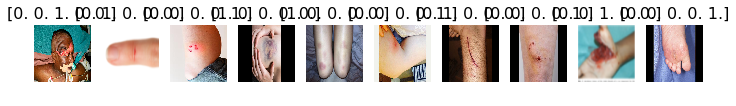

In [20]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles = test_labels) #AS SEEN BELOW, EACH TEST_IMAGE IS EXTREMELY LONG AND OVERLAPPING

In [21]:
test_labels = test_batches.classes #WE CONVERT THE TEST_LABELS INTO ITS CATEGORIES

In [15]:
predictions = model.predict_generator(test_batches, steps = 20, verbose=0) #MAKE SURE THIS GENERATOR CREATES SUFFICIENT IMAGES

In [22]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

Confusion matrix, without normalization
[[21  4  6 11  8]
 [12  4  5  7 10]
 [17  4  2  6  5]
 [12  4  1 11  8]
 [15  3  5  4  6]]


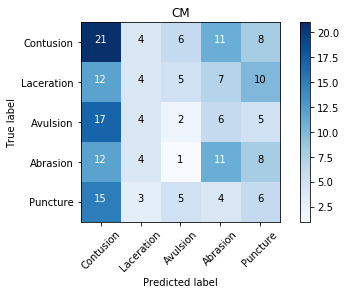

In [23]:
cm_plot_labels = ['Contusion', 'Laceration', 'Avulsion', 'Abrasion', 'Puncture']
plot_confusion_matrix(cm, cm_plot_labels, title='CM')

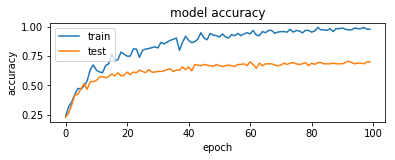

In [18]:
#THIS MODEL WAS SOURCED FROM THE INTERNET. THIS GRAPH SIMPLY TRACKS THE MODEL'S ACCURACY HISTORY
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

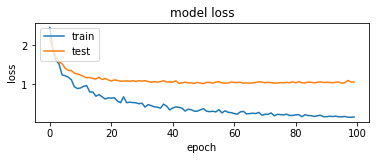

In [19]:
#THIS MODEL WAS SOURCED FROM THE INTERNET. THIS GRAPH SIMPLY TRACKS THE MODEL'S LOSS HISTORY
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  